<a href="https://colab.research.google.com/github/Yurovskyy/CDD/blob/main/TrabalhoGovernanca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Participantes

## Yuri Fonseca Lopes - 214450006

## Thaís Inácio Calixto - 194400059

# 1. Formalização do problema

## 1.1. Contextualização

Existem várias maneiras de avaliar o desempenho de uma empresa para decidir se é válido comprar ações da mesma. Alguns métodos existentes são:

CAPM (Modelo de precificação de ativos de capital). É um método que analise a relação entre o risco e o retorno que é esperado de um investimento, obtido a partir de princípios de diversificação com pressupostos simplificados. Inicialmente é irrealista (principalmente no Brasil).

HME (Hipótese do mercado eficiente). Essa hipótese afirma que os mercados são eficientes, ou seja, um agente não consegue alcançar consistentemente retornos superioers à média do mercado, pois os preços dos ativos refletem toda a informação disponível em um dado momento de tempo. É importante citar que o mercado não é 100% racional.

Análise técnica. É uma busca por padrões recorrentes e previsíveis nos preços do ativo. Esse método é negado pelo HME.

Análise Fundamentalista. Utiliza indicadores financeiros, de gestão, do negócio e do risco da empresa, além de índices macroeconômicos na busca de determinar o valor presente descontado dos fluxos de caixa da empresa para chegar ao valor justo de cada ação. Esse método é quase todo negado pelo HME.

## 1.2. Motivação

Podemos usar outro método de avaliação de empresas chamado Indice de Governança para definir conjuntos de empresas com boas governanças. Empresas com boa governança tendem a lucrar.

## 1.3. Importância

Esse novo modelo é importante, pois agrupa as empresas em conjuntos(clusters) que tendem a ser semelhantes. Isso significa que quando uma empresa foi bem avaliada usando os métodos citados em Contextualização (1.1), as outras empresas provavelmente também vão ser bem avaliadas usando esses métodos.
Ou seja, esse modelo nos ajudará a decidir se devemos ou não comprar as ações desse grupo de empresas.

## 1.4. Abordagem analítica

Vamos usar um algoritmo de MachineLearning para clusterizar as empresas.

# 2. Hipótese a ser investigada

## 2.1. Objetivo geral

Temos como objetivo obter conjuntos(clusters) que indicam empresas de boa governança.

## 2.2. Etapas para atingir o objetivo

Devemos
1. Definir o problema
2. Obter os dados
3. Explorar os dados
4. Preparar os dados
5. Construir o modelo
6. Avaliar o modelo (não é válido para clusterização)

# 3. Revisão bibliográfica

## 3.1 Duas referências de artigos científicos

- https://revistas.pucsp.br/rad/article/view/685
- https://periodicos.fgv.br/rbfin/article/view/1143


## 3.2 Dois projetos semelhantes

- https://www.fun-mooc.fr/en/courses/machine-learning-python-scikit-learn/
- https://github.com/andymcdgeo/Andys_YouTube_Notebooks

## 3.3 Como esses quatro estão inseridos no contexto do seu trabalho

Os dois artigos comparam o indice de governança com a lucratividade da empresa, corroborando com o objetivo geral (2.1) e com a motivação (1.2). Os dois projetos ensinam a utilizar o algoritmo de clusterização usando o k-means, especificadamente, os tutorials do Andys me foram muito úteis para entender o k-means.


# 4. Base de dados utilizada

## 4.1. Porquê essa base de dados é adequada?

Essa base de dados é adequada pois ela nos diz as respostas das empresas em relação as 5 categorias de governança.

## 4.2. Apresentar a base de dados

Serão extraídos de https://github.com/Yurovskyy/sitedeploy/raw/gh-pages/docs/dataset_CGVN.xlsx?download=. Vou converter os mesmos para CSV e coloca-lo no github do trabalho atual.

Como se trata de um algoritmo de clusterização, não precisamos de um dataset de teste.

## 4.3. Detalhe a base de dados

Como o arquivo original pesava 100mb, não foi possível formatar o mesmo por meio desse notebook, pois isso exigiria que eu fizesse upload do arquivo no github, mas o github barra arquivos de serem enviados acima de 50mb.

Por causa disso, criei um script local que retira as colunas do csv que eu não preciso para esse algoritmo e fiz upload do csv formatado no github.

> O script de limpeza usado se encontra no final do notebook. O script não é para ser executado.

O dataset formatado está no seguinte link: https://github.com/Yurovskyy/CDD/blob/main/dataset_CGVN.csv

No total, o dataset tem 115.722 entradas. Cada empresa em cada ano contém 54 Itens (entradas), logo o total de Itens que serão usados (Total das Praticas_adotadas) é 2.143 😀

No dataset temos as seguintes colunas
1. Data_Referencia
2. Versao
3. Nome_Empresarial
4. ID_Item
5. Pratica_Adotada

### 1. Data_Referencia

O item 1 refere-se a data em que as respostas foram colhidas. Algumas empresas mandam suas respostas desde 2018 (que é a data de inicio do dataset), outras começaram em 2019 por exemplo.

Vamos avaliar a governança empresarial de cada ano caso a empresa tenha uma entrada por ano. Dessa maneira, podemos também avaliar se a governança da empresa melhorou ou piorou com o passar do tempo.

> Tecnicamente falando, vamos contatenar a data ao Nome_Empresarial para diferenciar a empresa no tempo

### 2. Versao

O item 2 refere-se a versão das respostas. A empresa pode ter mandado uma resposta incompleta e ter submetido outra durante a data de entrega anual. Essa coluna não é relevante, pois sempre vamos considerar o resultado final.

### 3. Nome_Empresarial

O item 3 é um item para identificação da empresa -nome da empresa - (juntamente com a Data_Referencia)

### 4. ID_Item

O item 4 refere-se ao item de governança. Cada item tem um texto o descrevendo, que pode ser encontrado no seguinte link

https://yurovskyy.github.io/sitedeploy/

(Clique em dados e depois em governança). A tabela no final da página contém o ID_item e sua descrição (Princípio e Prática Recomendada).

### 5. Pratica_Adotada

o item 5 é o mais importante do dataset, pois nele temos a informação que queremos. Temos 4 **variáveis categóricas** condizentes as respostas das empresas de acordo com os ID_itens (item 4). Vamos realizar a seguinte transformação

- Sim → +1
- Não → -1
- Não se aplica → +0
- Parcialmente → +0,5

Se a resposta da empresa é sim, ela cumpre com a prática recomendada (ID_Item), se é não, ela não cumpre.
O Não se aplica se deve a empresas que essa prática não faz sentido.
O parcialmente é um meio termo entre o sim e o não

> Em iterações futuras do trabalho, acredito que devo trabalhar essa transformação de categóricas de uma forma mais aprofundada, pois o professor Marcos me disse que essa parte é bem importante. Rumo aos dados perfeitos!
> ### Perfect Data → Perfect Model → Perfect Results

Como os dados já estão sendo trabalhados a algum tempo (artigo), não existem valores faltantes 😀


# 5. Utilize uma biblioteca de autoML para ter o resultado inicial


In [42]:
# @title Importando os pacotes necessários

import pandas as pd
import requests
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import plotly.express as px


## 5.1. Porquê essa biblioteca?

Estou utilizando o sklearn pois é uma biblioteca de uso fácil com vários tutoriais e bem documentada.

In [43]:
# @title Carregando o dataset

# URL do arquivo CSV
url = 'https://github.com/Yurovskyy/CDD/raw/main/dataset_CGVN.csv'

# Baixar o arquivo CSV da web
response = requests.get(url)

# Verificar se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Ler o conteúdo do arquivo CSV usando o Pandas
    df = pd.read_csv(url)

# Se a solicitação não for bem-sucedida
else:
    print('Falha ao baixar o arquivo CSV.')

# Obter as dimensões do DataFrame


In [40]:
# @title Exploração inicial do dataset

dimensoes = df.shape
print("Número de entradas(linhas):", dimensoes[0])
print("Número de colunas(variáveis):", dimensoes[1])

# identificar o tipo de cada variável
display(df.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(df.head())

Número de entradas(linhas): 115722
Número de colunas(variáveis): 6


Data_Referencia      object
Versao                int64
Nome_Empresarial     object
ID_Item              object
Pratica_Adotada      object
PAN                 float64
dtype: object

,Data_Referencia,Versao,Nome_Empresarial,ID_Item,Pratica_Adotada,PAN
0,2018-12-31,1,BCO BRASIL S.A.,1.1.1,Sim,1.0
1,2018-12-31,1,BCO BRASIL S.A.,1.2.1,Sim,1.0
2,2018-12-31,1,BCO BRASIL S.A.,1.3.1,Sim,1.0
3,2018-12-31,1,BCO BRASIL S.A.,1.3.2,Sim,1.0
4,2018-12-31,1,BCO BRASIL S.A.,1.4.1,Não,-1.0


In [27]:
# @title Valores faltantes
# @markdown Como eu disso, não temos valores faltantes!

# ver a porcentagem valores faltantes
display((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Data_Referencia     0.0
Versao              0.0
Nome_Empresarial    0.0
ID_Item             0.0
Pratica_Adotada     0.0
dtype: float64

In [28]:
# @title Descrição dos valores categóricos
# @markdown Temos 499 empresas únicas! (contando com as que se repetem em diferentes intervalos de tempo)

display(df.describe(include=['O']))


,Data_Referencia,Nome_Empresarial,ID_Item,Pratica_Adotada
count,115722,115722,115722,115722
unique,34,499,54,4
top,2022-12-31,METALURGICA GERDAU S.A.,1.1.1,Sim
freq,23004,378,2143,60208


In [29]:
# @title Transformação das variáveis categórias em numéricas
# @markdown Vamos definir PAN como Práticas Adotadas Numéricas

# Criar um dicionário de mapeamento
mapeamento = {
    'Sim': 1,
    'Não': -1,
    'Não se Aplica': 0,
    'Parcialmente': 0.5
}

# Usar o método map() para aplicar o mapeamento à coluna
df['PAN'] = df['Pratica_Adotada'].map(mapeamento)

# Exibir o DataFrame com a nova coluna
display(df)

,Data_Referencia,Versao,Nome_Empresarial,ID_Item,Pratica_Adotada,PAN
0,2018-12-31,1,BCO BRASIL S.A.,1.1.1,Sim,1.0
1,2018-12-31,1,BCO BRASIL S.A.,1.2.1,Sim,1.0
2,2018-12-31,1,BCO BRASIL S.A.,1.3.1,Sim,1.0
3,2018-12-31,1,BCO BRASIL S.A.,1.3.2,Sim,1.0
4,2018-12-31,1,BCO BRASIL S.A.,1.4.1,Não,-1.0
...,...,...,...,...,...,...
115717,2024-12-31,1,METALURGICA GERDAU S.A.,5.3.2,Sim,1.0
115718,2024-12-31,1,METALURGICA GERDAU S.A.,5.4.1,Sim,1.0
115719,2024-12-31,1,METALURGICA GERDAU S.A.,5.5.1,Sim,1.0
115720,2024-12-31,1,METALURGICA GERDAU S.A.,5.5.2,Sim,1.0


Nesse momento, introduzimos uma nova coluna no nosso dataset, chamada PAN (Prática Adotada Numérica). Ela é a soma das Pratidas_Adotadas de acordo com o mapeamento feito para cada empresa em cada intervalo de tempo.
Vamos usar essa variável para a clusterização!

In [30]:
# @title Agrupamento
# @markdown Temos 2.143 empresas ! (Sem contar com as que se repetem no tempo) (Como se uma empresa que tivesse outra resposta em outr ano fosse outra empresa)

# Em seguida, agrupe os dados pelo nome da empresa e some os valores mapeados
soma_por_empresa = df.groupby(['Nome_Empresarial', 'Data_Referencia'])['PAN'].sum().reset_index()

# Exibir o DataFrame com as somas por empresa
display(soma_por_empresa.describe())
display(soma_por_empresa)


,PAN
count,2143.000000
mean,21.218852
std,19.345601
min,-40.000000
25%,11.500000
50%,26.000000
75%,35.750000
max,51.500000


,Nome_Empresarial,Data_Referencia,PAN
0,2W ECOBANK S.A.,2022-12-31,37.5
1,2W ECOBANK S.A.,2023-12-31,44.0
2,3R PETROLEUM ÓLEO E GÁS S.A.,2021-12-31,31.0
3,3R PETROLEUM ÓLEO E GÁS S.A.,2022-12-31,38.5
4,3R PETROLEUM ÓLEO E GÁS S.A.,2023-12-31,39.0
...,...,...,...
2138,ZAMP SA,2019-12-31,15.5
2139,ZAMP SA,2020-12-31,27.0
2140,ZAMP SA,2021-12-31,30.5
2141,ZAMP SA,2022-12-31,35.0


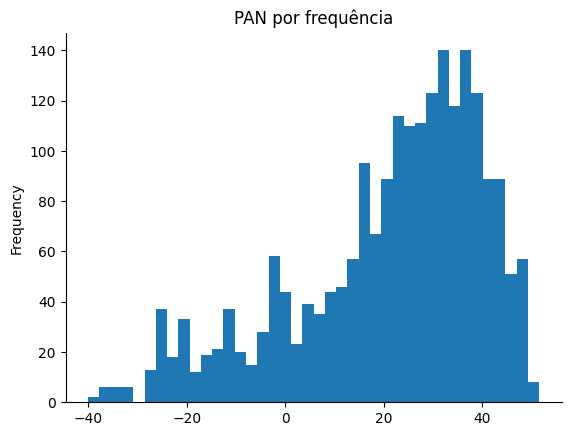

In [32]:
# @title Gráfico de práticas adotadas numéricas (PAN) por frequência

soma_por_empresa['PAN'].plot(kind='hist', bins=40, title='PAN por frequência')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:

# @title Toques finais

# Dividindo os dados em features e target
X = soma_por_empresa[['PAN']]

n_clusters = 3

# Criando e ajustando o modelo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## 5.2. Qual é a métrica de avaliação utilizada?

Como se trata de um algoritmo de clusterização, não temos métrica de avaliação.

## 5.3. Apresente os resultados

In [37]:
# @title Exibindo os clurters em um gráfico interativo


# Adicionando os clusters aos dados
soma_por_empresa['Cluster'] = clusters

# Criando o gráfico interativo
fig = px.scatter(soma_por_empresa, x='Data_Referencia', y='PAN', color='Cluster', hover_data=['Nome_Empresarial'])
fig.update_layout(title='K-means Clustering', xaxis_title='Data de Refêrencia', yaxis_title='PAN')
fig.show()

# 6. Discussão e Considerações finais

## 6.1. Os resultados são bons?

Os resultados de fato dividiram em conjuntos (clursters) as empresas de acordo com a governança delas.
De acordo com o objetivo geral (2.1) e com a motivação (1.2), podemos comprar as ações das empresas em **amarelo** que teremos mais lucros do que as empresas em azul.

## 6.2. Existe algum ganho em usar indicadores estatíticos para os dados?

Nesse caso não. Os indicadores foram utilizados para entender o dataset (seção de código Agrupamento)

## 6.3. A proposta é adequada para ser utilizada ao longo do curso?

Acredito que sim! Podems fazer outros mapeamentos nas Praticas_Recomendadas, podemos clusterizar de acordo com as 5 categorias de governança, descobrir qual item de governança é o mais relevante e é compartilhado pelas empresas de boa governança. Podemos também ver tendências de empresas que melhoram a sua governaça e problemas internos que fazem as empresas de boa governança ficarem piores. Entre outros!

In [39]:
# @title ANEXO! (NÃO EXECUTE)

# import pandas as pd

# # Carregar o arquivo CSV
# df = pd.read_csv('C:\\Users\\Yuri\\Desktop\\artigo\\backend\\novoscript\\results\\dataset_CGVN.csv',sep=";")

# # Selecionar as colunas necessárias
# colunas_desejadas = ['Data_Referencia', 'Versao', 'Nome_Empresarial', 'ID_Item', 'Pratica_Adotada']
# df = df[colunas_desejadas]

# # Salvar o arquivo CSV modificado
# df.to_csv('dataset_CGVN.csv', index=False)
